In [ ]:
from lifelines import CoxPHFitter

In [ ]:
real_final_dataset = pd.read_csv("modeling_data_1105_rkdms.csv")

In [ ]:
real_final_dataset.head(1)

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,복층여부,폐업여부,카페유형,계절,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,univ_1000m 개수,hospital_re_500m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,월 임대료 평균 점수,생활인구 점수
0,커피앤모바일,장위제1동,서울특별시 성북구 장월로 174 (장위동),2010-01-04,2010-04-02,17.36,0,1,개인 카페,겨울,0,0,0,0,0,286,88,1,2,2,1,2,0,20,0,0,-1.448152,-0.216536


In [ ]:
real_final_dataset.columns

Index(['업소명', '행정동명', '소재지도로명', '영업자시작일', '폐업일자', '총면적', '복층여부', '폐업여부',
       '카페유형', '계절', '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m',
       '스타벅스 개수_500m', '카페 개수_500m', '음식점 개수_500m', '총 영업일', 'bank_500m 개수',
       'elementary_500m 개수', 'middle_500m 개수', 'high_800m 개수', 'univ_1000m 개수',
       'hospital_re_500m 개수', 'bus_250m 개수', 'subway_250m 존재여부',
       'hospital_big_1000m 개수', '월 임대료 평균 점수', '생활인구 점수'],
      dtype='object')

In [ ]:
df2 = real_final_dataset[[ '총면적', '복층여부',  '폐업여부', '총 영업일','카페유형',  '계절', '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m',
       '스타벅스 개수_500m', '카페 개수_500m', '음식점 개수_500m', 'bank_500m 개수',
       'elementary_500m 개수', 'middle_500m 개수', 'high_800m 개수', 'univ_1000m 개수',
       'hospital_re_500m 개수', 'bus_250m 개수', 'subway_250m 존재여부',
       'hospital_big_1000m 개수', '생활인구 점수','월 임대료 평균 점수']]

In [ ]:
df2.head(1)

,총면적,복층여부,폐업여부,총 영업일,카페유형,계절,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,univ_1000m 개수,hospital_re_500m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,생활인구 점수,월 임대료 평균 점수
0,17.36,0,1,88,개인 카페,겨울,0,0,0,0,0,286,1,2,2,1,2,0,20,0,0,-0.216536,-1.448152


In [ ]:
# 더미 변수로 변환
data_with_dummies = pd.get_dummies(df2, columns=['복층여부','카페유형','계절'], drop_first=True)

In [ ]:
data_with_dummies.isna().sum()

총면적                      0
폐업여부                     0
총 영업일                    0
고가프차 개수_500m             0
저가프차 개수_500m             0
중가프차 개수_500m             0
스타벅스 개수_500m             0
카페 개수_500m               0
음식점 개수_500m              0
bank_500m 개수             0
elementary_500m 개수       0
middle_500m 개수           0
high_800m 개수             0
univ_1000m 개수            0
hospital_re_500m 개수      0
bus_250m 개수              0
subway_250m 존재여부         0
hospital_big_1000m 개수    0
생활인구 점수                  0
월 임대료 평균 점수              0
복층여부_1                   0
카페유형_고가 프랜차이즈            0
카페유형_저가 프랜차이즈            0
카페유형_중가 프랜차이즈            0
계절_겨울                    0
계절_봄                     0
계절_여름                    0
dtype: int64

In [ ]:
data_with_dummies.head(1)

,총면적,폐업여부,총 영업일,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,univ_1000m 개수,hospital_re_500m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,생활인구 점수,월 임대료 평균 점수,복층여부_1,카페유형_고가 프랜차이즈,카페유형_저가 프랜차이즈,카페유형_중가 프랜차이즈,계절_겨울,계절_봄,계절_여름
0,17.36,1,88,0,0,0,0,0,286,1,2,2,1,2,0,20,0,0,-0.216536,-1.448152,False,False,False,False,True,False,False


In [ ]:
data_with_dummies.corr()

,총면적,폐업여부,총 영업일,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,univ_1000m 개수,hospital_re_500m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,생활인구 점수,월 임대료 평균 점수,복층여부_1,카페유형_고가 프랜차이즈,카페유형_저가 프랜차이즈,카페유형_중가 프랜차이즈,계절_겨울,계절_봄,계절_여름
총면적,1.000000,-0.027121,0.049110,0.011603,-0.009417,-0.000766,-0.002885,0.039840,0.080292,0.053865,-0.034779,-0.021255,-0.029657,0.011134,0.017049,0.017588,0.025863,-0.012914,0.045237,0.047625,0.214100,0.235567,-0.033891,0.005009,0.022358,0.008614,-0.019050
폐업여부,-0.027121,1.000000,-0.496856,-0.128116,-0.230033,-0.229760,-0.138084,-0.131221,0.125856,0.037443,-0.021646,-0.016525,0.009349,-0.004197,0.045375,-0.014420,-0.011384,-0.034285,-0.003969,0.048774,-0.038548,-0.092479,-0.151254,-0.076195,-0.007976,-0.004232,0.001264
총 영업일,0.049110,-0.496856,1.000000,-0.208944,-0.304390,-0.211698,-0.211296,-0.170239,0.051893,-0.012104,0.015933,0.004789,-0.014662,0.032724,-0.029861,0.048397,0.029084,0.021105,0.020259,-0.025768,0.029147,0.039655,-0.093718,0.075679,0.017941,0.007628,-0.026508
고가프차 개수_500m,0.011603,-0.128116,-0.208944,1.000000,0.588387,0.538476,0.908608,0.602664,0.338398,0.554348,-0.191589,-0.130133,-0.107279,0.013530,0.141641,0.066850,0.098163,-0.012489,0.436536,0.357696,0.007231,0.042722,0.066747,-0.010559,-0.006283,-0.023203,0.032260
저가프차 개수_500m,-0.009417,-0.230033,-0.304390,0.588387,1.000000,0.606742,0.569580,0.525056,0.130180,0.268387,-0.086884,-0.084324,-0.071927,-0.049582,0.050893,0.064662,0.061324,0.000713,0.165843,0.114008,-0.001383,0.046838,0.136508,-0.011820,-0.012088,0.005019,0.024787
중가프차 개수_500m,-0.000766,-0.229760,-0.211698,0.538476,0.606742,1.000000,0.490555,0.455693,0.197973,0.323324,-0.100038,-0.086262,-0.085711,-0.059314,0.153189,0.101310,0.081533,0.077369,0.242915,0.112471,-0.001327,0.059414,0.117400,-0.007593,-0.011357,0.010682,0.019080
스타벅스 개수_500m,-0.002885,-0.138084,-0.211296,0.908608,0.569580,0.490555,1.000000,0.544425,0.216964,0.405642,-0.144788,-0.095297,-0.089533,0.009919,0.073053,0.045890,0.062528,-0.026759,0.359777,0.260727,0.001632,0.012554,0.072493,-0.008296,-0.006936,-0.042813,0.049100
카페 개수_500m,0.039840,-0.131221,-0.170239,0.602664,0.525056,0.455693,0.544425,1.000000,0.594578,0.404127,-0.178120,-0.169790,-0.184231,0.113592,0.114466,0.086423,0.053849,-0.102335,0.342362,0.354473,0.042006,0.033223,0.039073,-0.031120,-0.005684,0.002471,0.010658
음식점 개수_500m,0.080292,0.125856,0.051893,0.338398,0.130180,0.197973,0.216964,0.594578,1.000000,0.594222,-0.255658,-0.232955,-0.232065,0.072210,0.279615,0.116409,0.122181,-0.025881,0.438749,0.451605,0.051612,0.025637,-0.062748,-0.031750,0.000370,0.000830,-0.002154
bank_500m 개수,0.053865,0.037443,-0.012104,0.554348,0.268387,0.323324,0.405642,0.404127,0.594222,1.000000,-0.266757,-0.176306,-0.163573,-0.068592,0.181406,0.107467,0.105274,-0.045883,0.579749,0.507272,0.015156,0.072001,-0.018606,-0.016246,0.012186,-0.005887,-0.002471


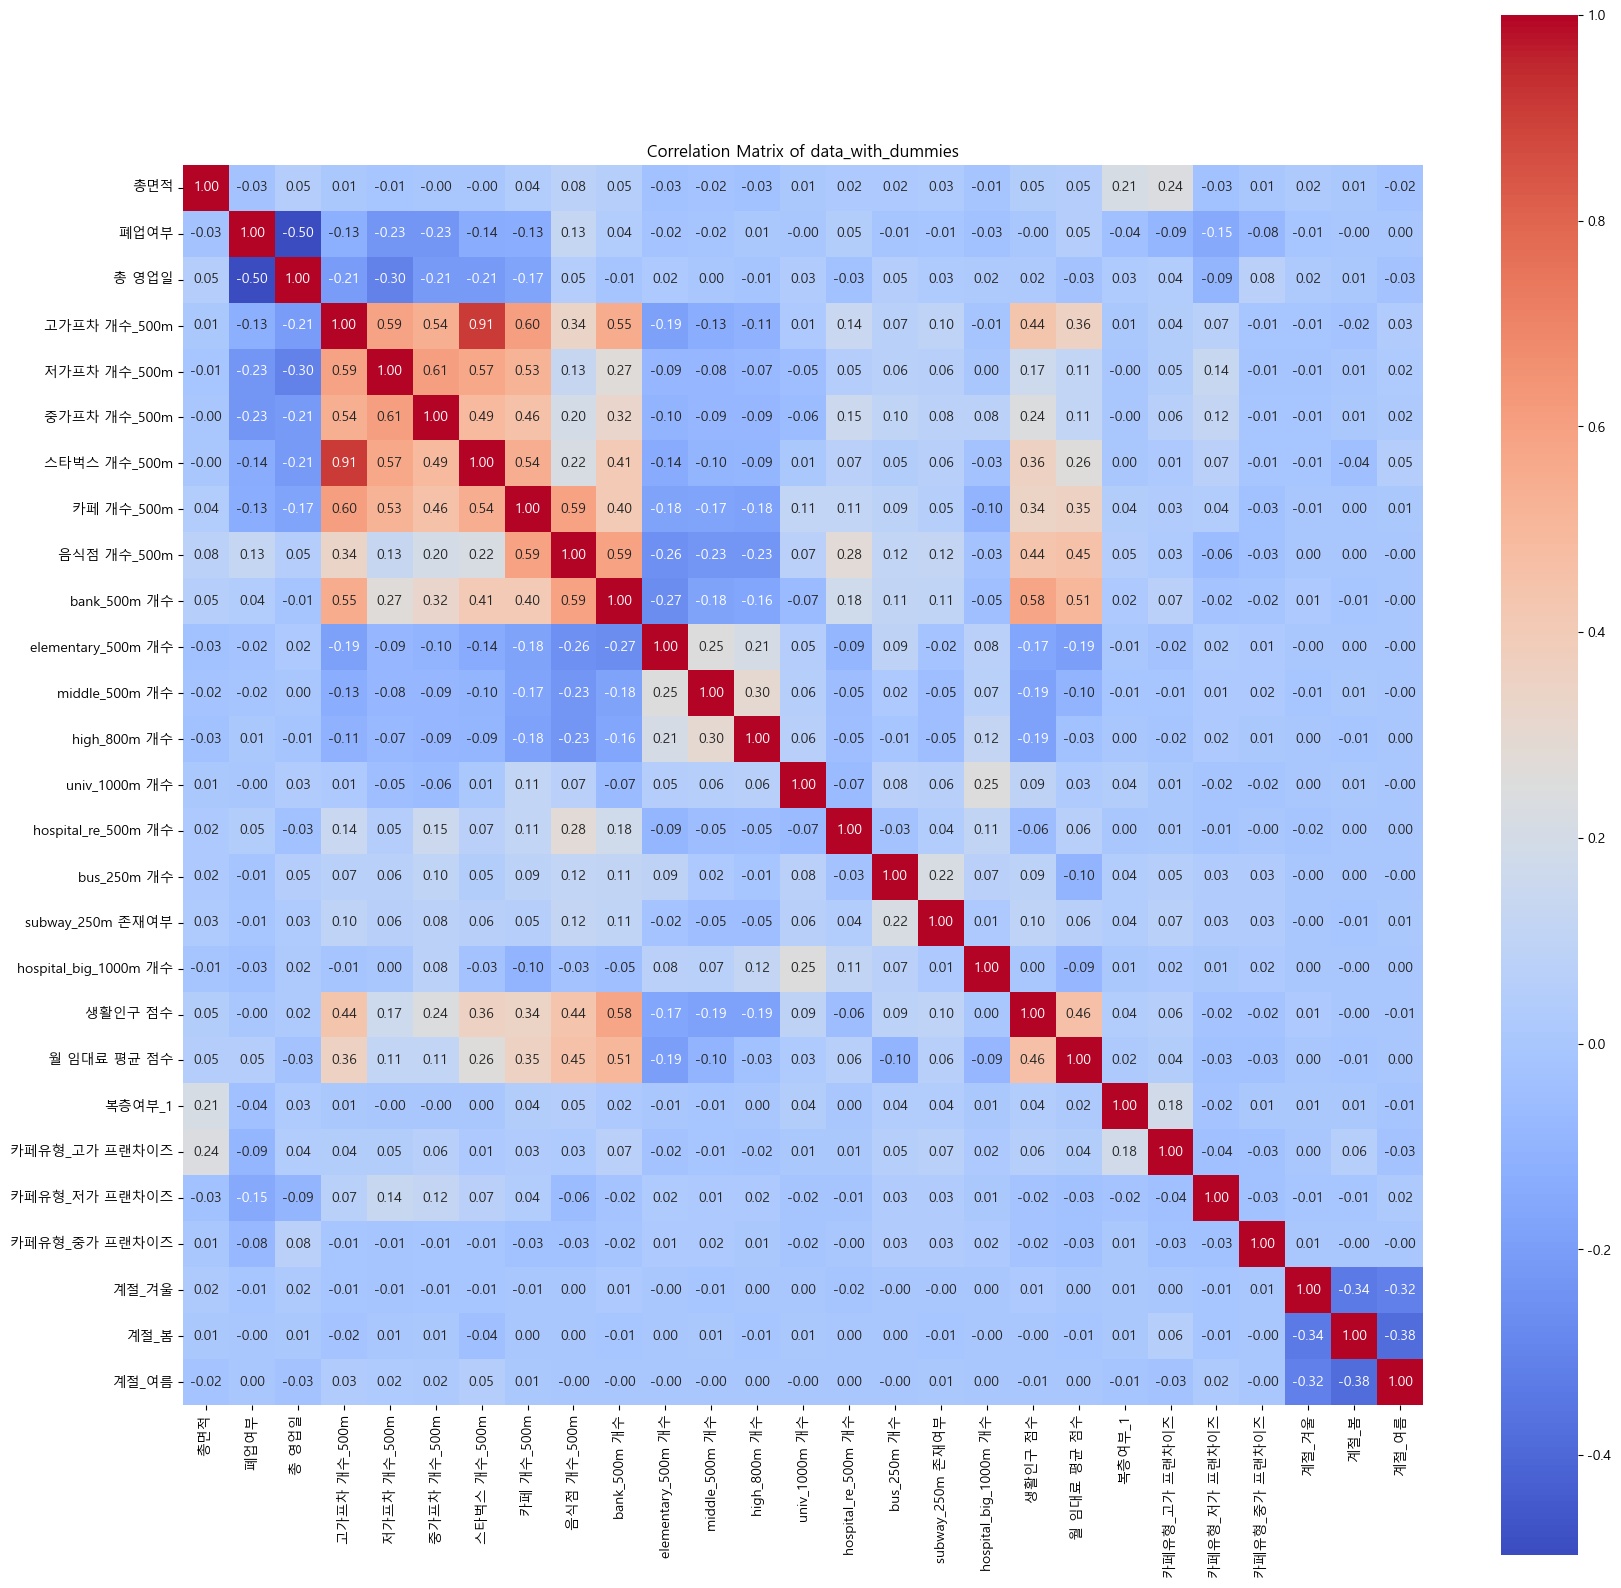

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(20, 20))
sns.heatmap(data_with_dummies.corr(), annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of data_with_dummies")
plt.show() 

In [ ]:
X = data_with_dummies.drop(columns=['총 영업일', '폐업여부'])
y = data_with_dummies[['총 영업일', '폐업여부']]

# train/test 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 훈련 세트와 테스트 세트를 다시 병합
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [ ]:
# 1. 월 빼기 (의미가 계절과 같음)
# 2. 1~4분기 생활인구 점수 -> 생활인구 점수로 합침

<lifelines.CoxPHFitter: fitted with 33424 total observations, 19780 right-censored observations>
             duration col = '총 영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 33424
number of events observed = 13644
   partial log-likelihood = -134543.59
         time fit was run = 2024-11-06 01:54:33 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
총면적                   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
고가프차 개수_500m           0.04      1.04      0.01            0.03            0.05                1.03                1.05
저가프차 개수_500m          -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
중가프차 개수_500m          -0.14      0.87      0.01           -0.15           -0.12                0.86                0.89
스타벅스 개수_500m          -0.02      0.98      0.01           -0.04            0.00                0.96                1.00
카페 개수_500m            -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
음식점 개수_500m            0.00      1.00      0.00            0.00            0.00                1.00                1.00
bank_500m 개수           0.01      1.01      0.00            0.00            0.01                1.00                1.01
elementary_500m 개수    -0.00      1.00      0.01           -0.02            0.02                0.98                1.02
middle_500m 개수        -0.01      0.99      0.01           -0.04            0.01                0.96                1.01
high_800m 개수           0.04      1.05      0.01            0.03            0.06                1.03                1.06
univ_1000m 개수         -0.03      0.97      0.01           -0.06           -0.01                0.94                0.99
hospital_re_500m 개수    0.03      1.03      0.01            0.02            0.04                1.02                1.04
bus_250m 개수           -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
subway_250m 존재여부      -0.06      0.94      0.02           -0.10           -0.02                0.90                0.98
hospital_big_1000m 개수 -0.07      0.93      0.01           -0.10           -0.05                0.91                0.96
생활인구 점수               -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
월 임대료 평균 점수            0.04      1.04      0.01            0.02            0.05                1.02                1.05
복층여부_1                -0.23      0.79      0.07           -0.37           -0.10                0.69                0.91
카페유형_고가 프랜차이즈         -0.86      0.42      0.08           -1.01           -0.71                0.36                0.49
카페유형_저가 프랜차이즈         -1.96      0.14      0.15           -2.25           -1.68                0.11                0.19
카페유형_중가 프랜차이즈         -1.09      0.34      0.08           -1.24           -0.94                0.29                0.39
계절_겨울                 -0.06      0.94      0.03           -0.11           -0.01                0.89                0.99
계절_봄                  -0.02      0.98      0.02           -0.06            0.03                0.94                1.03
계절_여름                 -0.01      0.99      0.02           -0.06            0.04                0.94                1.04

                       cmp to      z      p  -log2(p)
covariate                                            
총면적                      0.00  -8.33 <0.005     53.45
고가프차 개수_500m             0.00   5.79 <0.005     27.10
저가프차 개수_500m             0.00  -1.54   0.12      3.02
중가프차 개수_500m             0.00 -17.28 <0.005    219.92
스타벅스 개수_500m             0.00  -1.71   0.09      3.52
카페 개수_500m   

<Axes: xlabel='log(HR) (95% CI)'>

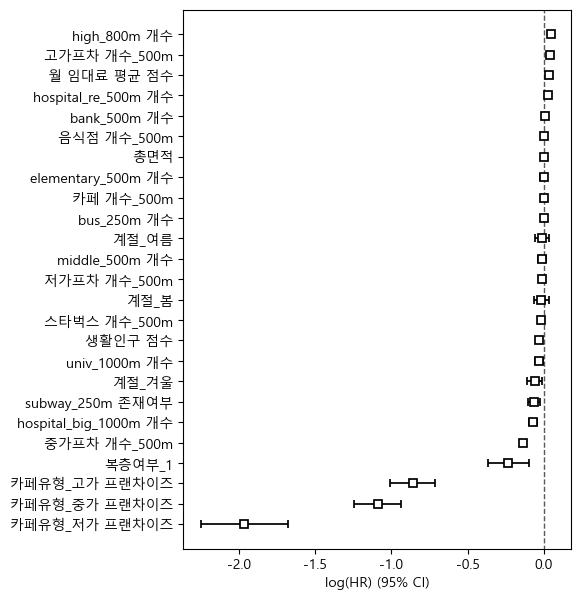

In [ ]:
cph = CoxPHFitter()
cph.fit(train_data, duration_col='총 영업일', event_col='폐업여부')
cph.print_summary()  # 모델 요약 출력

plt.figure(figsize=(5,7))
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False
cph.plot()

In [ ]:
train_data.shape

(33424, 27)

In [ ]:
# CPH 모델의 가정 확인
cph.check_assumptions(train_data)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 33424 total observations, 19780 right-censored observations>
         test_name = proportional_hazard_test

---
                            test_statistic      p  -log2(p)
bank_500m 개수          km              3.27   0.07      3.82
                      rank            3.42   0.06      3.96
bus_250m 개수           km             39.53 <0.005     31.53
                      rank           40.35 <0.005     32.13
elementary_500m 개수    km             38.28 <0.005     30.60
                      rank           44.08 <0.005     34.88
high_800m 개수          km             30.14 <0.005     24.57
                      rank           33.45 <0.005     27.02
hospital_big_1000m 개수 km              0.52   0.47      1.09
                      rank            1.01   0.32      1.66
hospital_re_500m 개수   km             47.46 <0.005     37.37
                      rank           54.25 <0.005     42.37
middle_500m 개수        km             12.44 <0.005     11.21
                      rank           14.05 <0.005     12.45
subway_250m 존재여부      km              1.28   0.26      1.95
                      rank            1.54   0.21      2.22
univ_1000m 개수         km             18.58 <0.005     15.90
                      rank           18.74 <0.005     16.03
계절_겨울                 km              8.09 <0.005      7.81
                      rank            8.47 <0.005      8.11
계절_봄                  km              3.45   0.06      3.98
                      rank            3.18   0.07      3.75
계절_여름                 km              0.98   0.32      1.64
                      rank            0.83   0.36      1.46
고가프차 개수_500m          km            334.64 <0.005    245.91
                      rank          364.69 <0.005    267.66
복층여부_1                km              0.00   0.97      0.04
                      rank            0.01   0.93      0.11
생활인구 점수               km              4.51   0.03      4.89
                      rank            5.13   0.02      5.41
스타벅스 개수_500m          km            176.50 <0.005    131.38
                      rank          176.32 <0.005    131.25
월 임대료 평균 점수           km             47.79 <0.005     37.62
                      rank           51.82 <0.005     40.58
음식점 개수_500m           km            210.26 <0.005    155.86
                      rank          213.17 <0.005    157.97
저가프차 개수_500m          km              0.87   0.35      1.51
                      rank            0.90   0.34      1.54
중가프차 개수_500m          km             17.31 <0.005     14.94
                      rank           11.15 <0.005     10.22
총면적                   km            101.39 <0.005     76.81
                      rank          101.70 <0.005     77.04
카페 개수_500m            km            112.43 <0.005     84.85
                      rank          102.45 <0.005     77.58
카페유형_고가 프랜차이즈         km             18.14 <0.005     15.57
                      rank           15.34 <0.005     13.44
카페유형_저가 프랜차이즈         km              2.12   0.15      2.78
                      rank            1.71   0.19      2.39
카페유형_중가 프랜차이즈         km             13.87 <0.005     12.32
                      rank           14.02 <0.005     12.44



1. Variable '총면적' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable '총면적' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable '총면적' using pd.cut, and then specify it in `strata=['총면적',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable '고가프차 개수_500m' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable '고가프차 개수_500m' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   A

[]

In [ ]:
df22 = df2.copy()

 # 고가프차 개수 제외

In [ ]:
qqqq = data_with_dummies.drop(columns = '고가프차 개수_500m')

<lifelines.CoxPHFitter: fitted with 47749 total observations, 28244 right-censored observations>
             duration col = '총 영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 47749
number of events observed = 19505
   partial log-likelihood = -199332.92
         time fit was run = 2024-11-06 01:50:13 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
총면적                   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
저가프차 개수_500m          -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
중가프차 개수_500m          -0.13      0.88      0.01           -0.14           -0.12                0.87                0.89
스타벅스 개수_500m           0.04      1.04      0.01            0.03            0.05                1.03                1.05
카페 개수_500m            -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
음식점 개수_500m            0.00      1.00      0.00            0.00            0.00                1.00                1.00
bank_500m 개수           0.01      1.01      0.00            0.01            0.02                1.01                1.02
elementary_500m 개수    -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
middle_500m 개수        -0.03      0.97      0.01           -0.05           -0.01                0.95                0.99
high_800m 개수           0.04      1.04      0.01            0.03            0.05                1.03                1.06
univ_1000m 개수         -0.02      0.98      0.01           -0.05           -0.00                0.96                1.00
hospital_re_500m 개수    0.03      1.03      0.00            0.02            0.04                1.02                1.04
bus_250m 개수           -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
subway_250m 존재여부      -0.04      0.96      0.02           -0.07           -0.01                0.93                0.99
hospital_big_1000m 개수 -0.07      0.94      0.01           -0.09           -0.04                0.92                0.96
생활인구 점수               -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
월 임대료 평균 점수            0.04      1.04      0.01            0.02            0.05                1.02                1.05
복층여부_1                -0.19      0.83      0.06           -0.30           -0.08                0.74                0.92
카페유형_고가 프랜차이즈         -0.89      0.41      0.06           -1.02           -0.77                0.36                0.46
카페유형_저가 프랜차이즈         -2.06      0.13      0.13           -2.31           -1.81                0.10                0.16
카페유형_중가 프랜차이즈         -1.07      0.34      0.07           -1.20           -0.95                0.30                0.39
계절_겨울                 -0.05      0.95      0.02           -0.09           -0.01                0.91                0.99
계절_봄                  -0.00      1.00      0.02           -0.04            0.04                0.96                1.04
계절_여름                  0.02      1.02      0.02           -0.02            0.06                0.98                1.06

                       cmp to      z      p  -log2(p)
covariate                                            
총면적                      0.00 -10.00 <0.005     75.81
저가프차 개수_500m             0.00  -1.95   0.05      4.27
중가프차 개수_500m             0.00 -19.87 <0.005    289.49
스타벅스 개수_500m             0.00   6.90 <0.005     37.45
카페 개수_500m               0.00 -13.43 <0.005    134.11
음식점 개수_500m              0.00  19.44 <0.005    277.32
bank_500m 개수             0.00   5.81 <0.005     27.25
elementary_500m 개수       

<Axes: xlabel='log(HR) (95% CI)'>

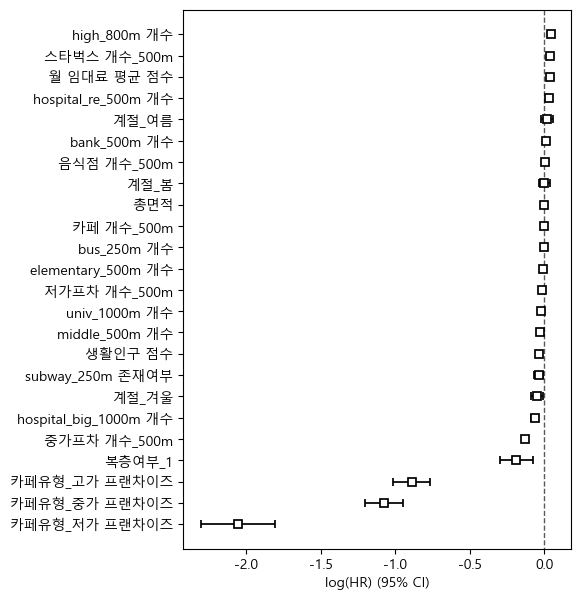

In [ ]:
cph = CoxPHFitter()
cph.fit(qqqq, duration_col='총 영업일', event_col='폐업여부')
cph.print_summary()

plt.figure(figsize=(5,7))
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False
cph.plot()

<lifelines.CoxPHFitter: fitted with 47749 total observations, 28244 right-censored observations>
             duration col = '총 영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 47749
number of events observed = 19505
   partial log-likelihood = -199312.38
         time fit was run = 2024-11-05 16:35:39 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
총면적                   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
고가프차 개수_500m           0.03      1.03      0.00            0.03            0.04                1.03                1.04
저가프차 개수_500m          -0.02      0.98      0.01           -0.04           -0.01                0.96                0.99
중가프차 개수_500m          -0.13      0.88      0.01           -0.15           -0.12                0.86                0.89
카페 개수_500m            -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
음식점 개수_500m            0.00      1.00      0.00            0.00            0.00                1.00                1.00
bank_500m 개수           0.01      1.01      0.00            0.00            0.01                1.00                1.01
elementary_500m 개수    -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
middle_500m 개수        -0.03      0.97      0.01           -0.05           -0.01                0.95                0.99
high_800m 개수           0.04      1.04      0.01            0.03            0.06                1.03                1.06
univ_1000m 개수         -0.03      0.97      0.01           -0.05           -0.00                0.95                1.00
hospital_re_500m 개수    0.03      1.03      0.00            0.02            0.04                1.02                1.04
bus_250m 개수           -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
subway_250m 존재여부      -0.05      0.95      0.02           -0.08           -0.01                0.92                0.99
hospital_big_1000m 개수 -0.07      0.93      0.01           -0.09           -0.05                0.91                0.95
생활인구 점수               -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
월 임대료 평균 점수            0.03      1.03      0.01            0.02            0.05                1.02                1.05
복층여부_1                -0.19      0.83      0.06           -0.30           -0.08                0.74                0.93
카페유형_고가 프랜차이즈         -0.90      0.41      0.06           -1.02           -0.77                0.36                0.46
카페유형_저가 프랜차이즈         -2.06      0.13      0.13           -2.31           -1.81                0.10                0.16
카페유형_중가 프랜차이즈         -1.08      0.34      0.07           -1.20           -0.95                0.30                0.39
계절_겨울                 -0.05      0.95      0.02           -0.09           -0.01                0.91                0.99
계절_봄                   0.00      1.00      0.02           -0.04            0.04                0.96                1.04
계절_여름                  0.02      1.02      0.02           -0.02            0.06                0.98                1.06

                       cmp to      z      p  -log2(p)
covariate                                            
총면적                      0.00  -9.95 <0.005     75.00
고가프차 개수_500m             0.00   9.55 <0.005     69.34
저가프차 개수_500m             0.00  -2.84 <0.005      7.79
중가프차 개수_500m             0.00 -20.50 <0.005    307.71
카페 개수_500m               0.00 -14.11 <0.005    147.78
음식점 개수_500m              0.00  19.89 <0.005    290.03
bank_500m 개수             0.00   3.83 <0.005     12.94
elementary_500m 개수       

<Axes: xlabel='log(HR) (95% CI)'>

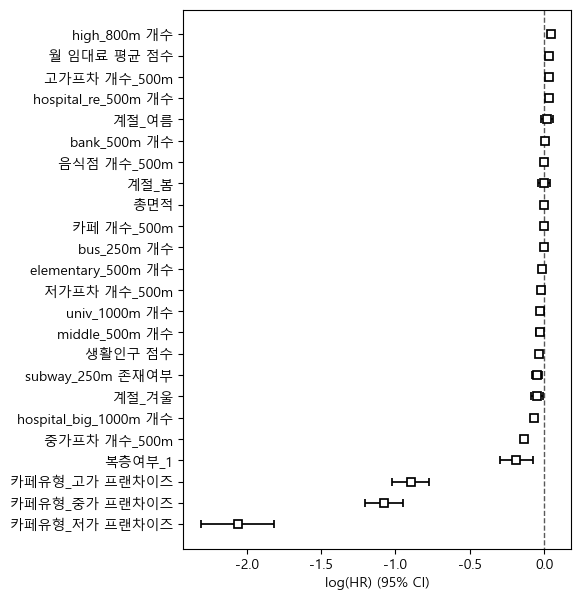

In [ ]:
qq = data_with_dummies.drop(columns = '스타벅스 개수_500m')

cph = CoxPHFitter()
cph.fit(qq, duration_col='총 영업일', event_col='폐업여부')
cph.print_summary()

plt.figure(figsize=(5,7))
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False
cph.plot()

# Cox 2차 - 변수정리 후  
- p값 0.05보다 작은 변수만 뽑아서 생존함수 돌리기

In [ ]:
data_with_dummies

,총면적,폐업여부,총 영업일,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,univ_1000m 개수,hospital_re_500m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,생활인구 점수,월 임대료 평균 점수,복층여부_1,카페유형_고가 프랜차이즈,카페유형_저가 프랜차이즈,카페유형_중가 프랜차이즈,계절_겨울,계절_봄,계절_여름
0,17.36,1,88,0,0,0,0,0,286,1,2,2,1,2,0,20,0,0,-0.216536,-1.448152,False,False,False,False,True,False,False
1,89.10,0,5381,0,0,0,0,0,185,1,1,1,1,0,0,10,0,0,-0.174917,-0.076715,False,False,False,False,True,False,False
2,390.88,0,5381,0,0,0,0,0,670,4,0,0,0,1,0,10,1,0,-0.197076,-0.637874,False,True,False,False,True,False,False
3,53.30,1,700,0,0,0,0,0,1508,1,0,0,1,2,0,4,0,1,0.531716,0.532188,False,False,False,False,True,False,False
4,6.60,1,133,0,0,0,0,0,294,11,1,3,5,0,0,6,0,1,-0.179222,0.164649,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47744,72.00,0,1,2,4,2,0,183,784,1,0,1,3,0,0,4,0,0,-0.191744,0.976666,False,False,False,False,False,False,False
47745,43.20,0,1,1,4,2,1,65,577,2,1,1,0,0,2,3,0,0,-0.272579,-1.201071,False,False,False,False,False,False,False
47746,87.93,0,1,5,5,3,4,75,588,1,1,1,3,0,4,9,0,1,-0.264227,0.466966,False,False,False,False,False,False,False
47747,58.50,0,1,2,3,1,1,51,267,1,2,1,1,0,0,7,0,0,-0.491984,-0.886023,False,False,True,False,False,False,False


In [ ]:
data_with_dummies.columns

Index(['총면적', '폐업여부', '총 영업일', '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m',
       '스타벅스 개수_500m', '카페 개수_500m', '음식점 개수_500m', 'bank_500m 개수',
       'elementary_500m 개수', 'middle_500m 개수', 'high_800m 개수', 'univ_1000m 개수',
       'hospital_re_500m 개수', 'bus_250m 개수', 'subway_250m 존재여부',
       'hospital_big_1000m 개수', '생활인구 점수', '월 임대료 평균 점수', '복층여부_1',
       '카페유형_고가 프랜차이즈', '카페유형_저가 프랜차이즈', '카페유형_중가 프랜차이즈', '계절_겨울', '계절_봄',
       '계절_여름'],
      dtype='object')

In [ ]:
data_with_dummies_2 = data_with_dummies[['총면적', '폐업여부', '총 영업일', '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m',
                                        '카페 개수_500m', '음식점 개수_500m', 'bank_500m 개수',
                                        'middle_500m 개수', 'high_800m 개수', 'univ_1000m 개수','hospital_re_500m 개수',  'subway_250m 존재여부',
                                        'hospital_big_1000m 개수', '생활인구 점수', '월 임대료 평균 점수', '복층여부_1',
                                        '카페유형_고가 프랜차이즈', '카페유형_저가 프랜차이즈', '카페유형_중가 프랜차이즈', '계절_겨울']]

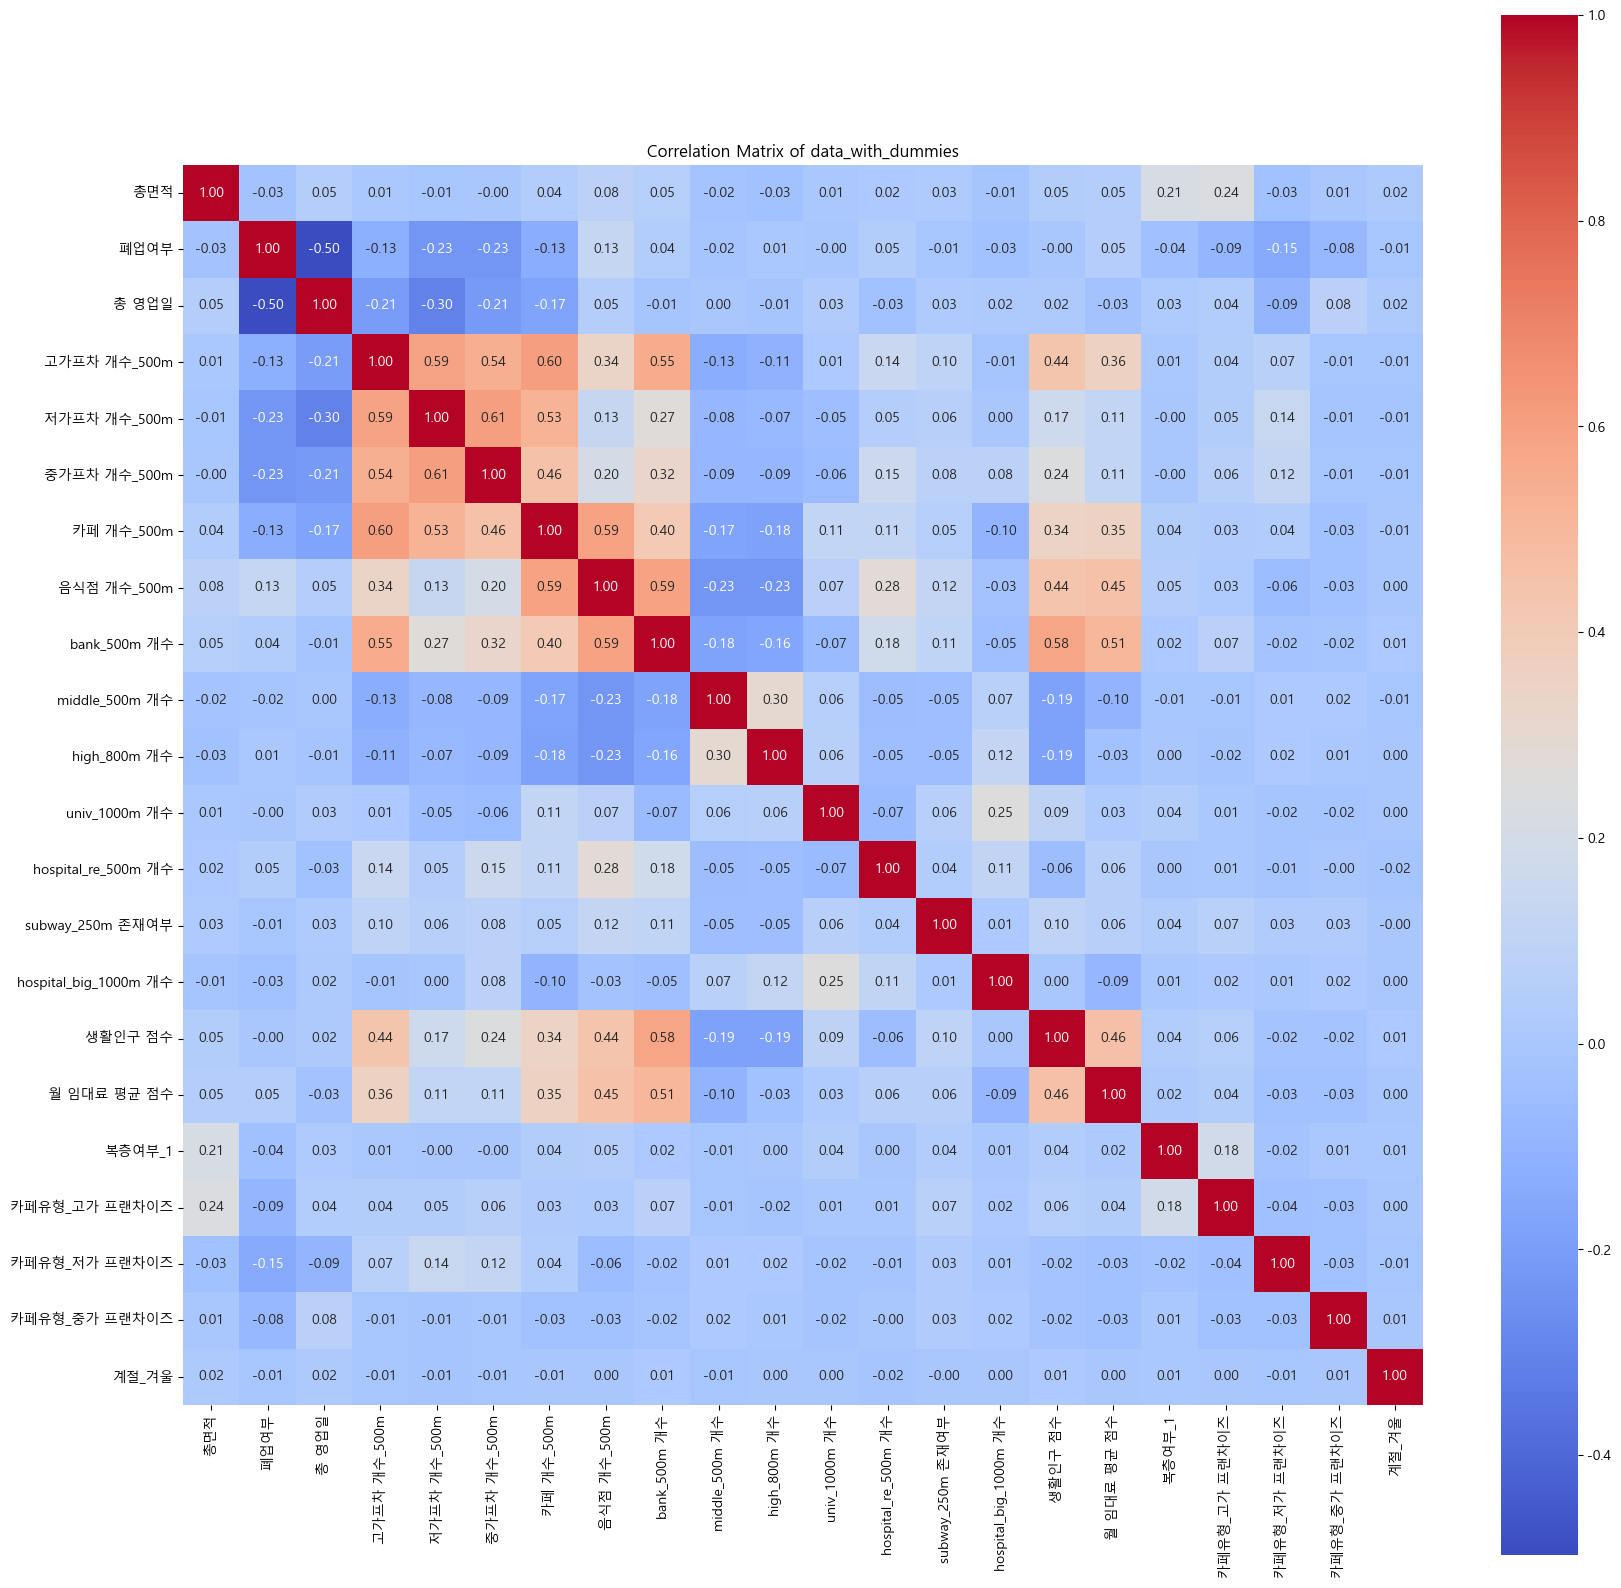

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(20, 20))
sns.heatmap(data_with_dummies_2.corr(), annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of data_with_dummies")
plt.show()

<lifelines.CoxPHFitter: fitted with 47749 total observations, 28244 right-censored observations>
             duration col = '총 영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 47749
number of events observed = 19505
   partial log-likelihood = -199315.69
         time fit was run = 2024-11-05 12:16:35 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
총면적                   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
고가프차 개수_500m           0.03      1.03      0.00            0.03            0.04                1.03                1.04
저가프차 개수_500m          -0.02      0.98      0.01           -0.04           -0.01                0.96                0.99
중가프차 개수_500m          -0.13      0.87      0.01           -0.15           -0.12                0.86                0.89
카페 개수_500m            -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
음식점 개수_500m            0.00      1.00      0.00            0.00            0.00                1.00                1.00
bank_500m 개수           0.01      1.01      0.00            0.00            0.01                1.00                1.01
middle_500m 개수        -0.03      0.97      0.01           -0.06           -0.01                0.95                0.99
high_800m 개수           0.04      1.04      0.01            0.03            0.05                1.03                1.06
univ_1000m 개수         -0.03      0.97      0.01           -0.05           -0.00                0.95                1.00
hospital_re_500m 개수    0.03      1.03      0.00            0.02            0.04                1.02                1.04
subway_250m 존재여부      -0.05      0.95      0.02           -0.09           -0.02                0.92                0.98
hospital_big_1000m 개수 -0.07      0.93      0.01           -0.09           -0.05                0.91                0.95
생활인구 점수               -0.03      0.97      0.01           -0.05           -0.02                0.96                0.98
월 임대료 평균 점수            0.04      1.04      0.01            0.02            0.05                1.02                1.05
복층여부_1                -0.19      0.83      0.06           -0.30           -0.08                0.74                0.92
카페유형_고가 프랜차이즈         -0.90      0.41      0.06           -1.02           -0.77                0.36                0.46
카페유형_저가 프랜차이즈         -2.06      0.13      0.13           -2.31           -1.82                0.10                0.16
카페유형_중가 프랜차이즈         -1.08      0.34      0.07           -1.21           -0.95                0.30                0.39
계절_겨울                 -0.05      0.95      0.02           -0.09           -0.02                0.91                0.98

                       cmp to      z      p  -log2(p)
covariate                                            
총면적                      0.00  -9.95 <0.005     75.10
고가프차 개수_500m             0.00   9.66 <0.005     70.93
저가프차 개수_500m             0.00  -2.83 <0.005      7.76
중가프차 개수_500m             0.00 -20.56 <0.005    309.53
카페 개수_500m               0.00 -14.21 <0.005    149.83
음식점 개수_500m              0.00  20.04 <0.005    294.31
bank_500m 개수             0.00   3.77 <0.005     12.58
middle_500m 개수           0.00  -3.10 <0.005      9.00
high_800m 개수             0.00   6.66 <0.005     35.11
univ_1000m 개수            0.00  -2.39   0.02      5.89
hospital_re_500m 개수      0.00   6.58 <0.005     34.35
subway_250m 존재여부         0.00  -3.24 <0.005      9.70
hospital_big_1000m 개수    0.00  -6.28 <0.005     31.47
생활인구 점수                  0.00  -6.43 <0.005     32.85
월 임대료 평균 점수              0.00   4.99 <0.005     20.69
복층여부_1                   0.00  -3.37 <0.005     10.38
카페유형_고가 프랜차이즈      

<Axes: xlabel='log(HR) (95% CI)'>

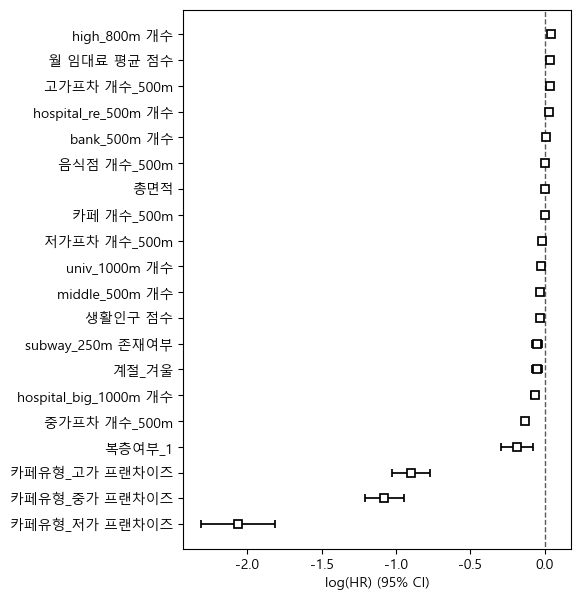

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(data_with_dummies_2, duration_col='총 영업일', event_col='폐업여부')
cph.print_summary()

plt.figure(figsize=(5,7))
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False
cph.plot()

# train/test로 돌려보기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_with_dummies_2

,총면적,폐업여부,총 영업일,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,카페 개수_500m,음식점 개수_500m,bank_500m 개수,middle_500m 개수,high_800m 개수,univ_1000m 개수,hospital_re_500m 개수,subway_250m 존재여부,hospital_big_1000m 개수,생활인구 점수,월 임대료 평균 점수,복층여부_1,카페유형_고가 프랜차이즈,카페유형_저가 프랜차이즈,카페유형_중가 프랜차이즈,계절_겨울
0,17.36,1,88,0,0,0,0,286,1,2,1,2,0,0,0,-0.216536,-1.448152,False,False,False,False,True
1,89.10,0,5381,0,0,0,0,185,1,1,1,0,0,0,0,-0.174917,-0.076715,False,False,False,False,True
2,390.88,0,5381,0,0,0,0,670,4,0,0,1,0,1,0,-0.197076,-0.637874,False,True,False,False,True
3,53.30,1,700,0,0,0,0,1508,1,0,1,2,0,0,1,0.531716,0.532188,False,False,False,False,True
4,6.60,1,133,0,0,0,0,294,11,3,5,0,0,0,1,-0.179222,0.164649,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47744,72.00,0,1,2,4,2,183,784,1,1,3,0,0,0,0,-0.191744,0.976666,False,False,False,False,False
47745,43.20,0,1,1,4,2,65,577,2,1,0,0,2,0,0,-0.272579,-1.201071,False,False,False,False,False
47746,87.93,0,1,5,5,3,75,588,1,1,3,0,4,0,1,-0.264227,0.466966,False,False,False,False,False
47747,58.50,0,1,2,3,1,51,267,1,1,1,0,0,0,0,-0.491984,-0.886023,False,False,True,False,False


In [ ]:
data_with_dummies_2.to_csv("data_with_dummies_2.csv",index = False)

In [ ]:
X = data_with_dummies_2.drop(columns=['총 영업일', '폐업여부'])
y = data_with_dummies_2[['총 영업일', '폐업여부']]

# train/test 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 훈련 세트와 테스트 세트를 다시 병합
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(train_data, duration_col='총 영업일', event_col='폐업여부')
cph.print_summary()  # 모델 요약 출력

<lifelines.CoxPHFitter: fitted with 33424 total observations, 19780 right-censored observations>
             duration col = '총 영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 33424
number of events observed = 13644
   partial log-likelihood = -134546.15
         time fit was run = 2024-11-05 17:05:30 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
총면적                   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
고가프차 개수_500m           0.03      1.03      0.00            0.02            0.04                1.02                1.04
저가프차 개수_500m          -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
중가프차 개수_500m          -0.14      0.87      0.01           -0.15           -0.12                0.86                0.89
카페 개수_500m            -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
음식점 개수_500m            0.00      1.00      0.00            0.00            0.00                1.00                1.00
bank_500m 개수           0.01      1.01      0.00            0.00            0.01                1.00                1.01
middle_500m 개수        -0.02      0.99      0.01           -0.04            0.01                0.96                1.01
high_800m 개수           0.04      1.04      0.01            0.03            0.06                1.03                1.06
univ_1000m 개수         -0.03      0.97      0.01           -0.06           -0.01                0.94                0.99
hospital_re_500m 개수    0.03      1.03      0.01            0.02            0.04                1.02                1.04
subway_250m 존재여부      -0.07      0.94      0.02           -0.11           -0.03                0.90                0.97
hospital_big_1000m 개수 -0.07      0.93      0.01           -0.10           -0.05                0.91                0.96
생활인구 점수               -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
월 임대료 평균 점수            0.04      1.04      0.01            0.02            0.06                1.02                1.06
복층여부_1                -0.23      0.79      0.07           -0.37           -0.10                0.69                0.91
카페유형_고가 프랜차이즈         -0.86      0.42      0.08           -1.01           -0.71                0.36                0.49
카페유형_저가 프랜차이즈         -1.97      0.14      0.15           -2.25           -1.68                0.11                0.19
카페유형_중가 프랜차이즈         -1.09      0.34      0.08           -1.25           -0.94                0.29                0.39
계절_겨울                 -0.05      0.95      0.02           -0.09           -0.01                0.91                0.99

                       cmp to      z      p  -log2(p)
covariate                                            
총면적                      0.00  -8.37 <0.005     53.90
고가프차 개수_500m             0.00   7.49 <0.005     43.72
저가프차 개수_500m             0.00  -1.61   0.11      3.22
중가프차 개수_500m             0.00 -17.28 <0.005    219.73
카페 개수_500m               0.00 -12.37 <0.005    114.33
음식점 개수_500m              0.00  18.17 <0.005    242.77
bank_500m 개수             0.00   2.83 <0.005      7.75
middle_500m 개수           0.00  -1.16   0.25      2.02
high_800m 개수             0.00   5.90 <0.005     28.02
univ_1000m 개수            0.00  -2.36   0.02      5.79
hospital_re_500m 개수      0.00   5.53 <0.005     24.93
subway_250m 존재여부         0.00  -3.40 <0.005     10.54
hospital_big_1000m 개수    0.00  -5.37 <0.005     23.63
생활인구 점수                  0.00  -4.95 <0.005     20.35
월 임대료 평균 점수              0.00   4.42 <0.005     16.61
복층여부_1                   0.00  -3.38 <0.005     10.45
카페유형_고가 프랜차이즈      

In [ ]:
# CPH 모델의 가정 확인
cph.check_assumptions(train_data)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 33424 total observations, 19780 right-censored observations>
         test_name = proportional_hazard_test

---
                            test_statistic      p  -log2(p)
bank_500m 개수          km             22.21 <0.005     18.64
                      rank           22.90 <0.005     19.16
high_800m 개수          km             19.19 <0.005     16.37
                      rank           21.33 <0.005     17.98
hospital_big_1000m 개수 km              0.72   0.40      1.33
                      rank            1.32   0.25      1.99
hospital_re_500m 개수   km             62.14 <0.005     48.15
                      rank           70.10 <0.005     53.98
middle_500m 개수        km             23.28 <0.005     19.45
                      rank           26.20 <0.005     21.63
subway_250m 존재여부      km              4.02   0.04      4.48
                      rank            4.60   0.03      4.97
univ_1000m 개수         km             17.63 <0.005     15.19
                      rank           17.84 <0.005     15.35
계절_겨울                 km              5.10   0.02      5.39
                      rank            5.76   0.02      5.93
고가프차 개수_500m          km            159.66 <0.005    119.16
                      rank          196.03 <0.005    145.55
복층여부_1                km              0.04   0.84      0.25
                      rank            0.01   0.94      0.09
생활인구 점수               km             14.79 <0.005     13.02
                      rank           16.08 <0.005     14.01
월 임대료 평균 점수           km             93.96 <0.005     71.39
                      rank          100.75 <0.005     76.34
음식점 개수_500m           km            191.54 <0.005    142.29
                      rank          193.35 <0.005    143.60
저가프차 개수_500m          km              0.16   0.69      0.53
                      rank            0.17   0.68      0.55
중가프차 개수_500m          km             20.49 <0.005     17.35
                      rank           13.71 <0.005     12.19
총면적                   km            104.13 <0.005     78.80
                      rank          104.27 <0.005     78.91
카페 개수_500m            km             98.31 <0.005     74.56
                      rank           88.82 <0.005     67.65
카페유형_고가 프랜차이즈         km             16.37 <0.005     14.23
                      rank           13.71 <0.005     12.19
카페유형_저가 프랜차이즈         km              2.22   0.14      2.87
                      rank            1.80   0.18      2.48
카페유형_중가 프랜차이즈         km             14.76 <0.005     13.00
                      rank           14.94 <0.005     13.14



1. Variable '총면적' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable '총면적' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable '총면적' using pd.cut, and then specify it in `strata=['총면적',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable '고가프차 개수_500m' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable '고가프차 개수_500m' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   A

[]

In [ ]:
# Concordance Index 평가
c_index_train = cph.concordance_index_
c_index_test = cph.score(test_data, scoring_method="concordance_index")

print(f"Concordance Index (Train): {c_index_train}")
print(f"Concordance Index (Test): {c_index_test}")

Concordance Index (Train): 0.6137890164550499
Concordance Index (Test): 0.6095747167096369


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# 특정 시간 임계값 설정 (예: 365일 이후의 사건 발생 여부를 예측)
time_threshold = 1000

# 테스트 세트에서 사건 발생 여부와 생존 확률 예측
# 사건 발생 확률이 특정 시간 임계값보다 낮으면 사건 발생으로 간주
predicted_survival = cph.predict_survival_function(test_data, times=[time_threshold]).T
predicted_event = (predicted_survival[time_threshold] < 0.5).astype(int)  # 50% 미만일 경우 사건 발생으로 예측

# 실제 사건 발생 여부 (0: 생존, 1: 사건 발생)
actual_event = (test_data['총 영업일'] <= time_threshold) & (test_data['폐업여부'] == 1)
actual_event = actual_event.astype(int)

# 혼동행렬 생성
conf_matrix = confusion_matrix(actual_event, predicted_event)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9739  334]
 [3834  418]]


In [ ]:
# 특정 시간 임계값 설정 (예: 365일 이후의 사건 발생 여부를 예측)
time_threshold = 1500

# 테스트 세트에서 사건 발생 여부와 생존 확률 예측
# 사건 발생 확률이 특정 시간 임계값보다 낮으면 사건 발생으로 간주
predicted_survival = cph.predict_survival_function(test_data, times=[time_threshold]).T
predicted_event = (predicted_survival[time_threshold] < 0.5).astype(int)  # 50% 미만일 경우 사건 발생으로 예측

# 실제 사건 발생 여부 (0: 생존, 1: 사건 발생)
actual_event = (test_data['총 영업일'] <= time_threshold) & (test_data['폐업여부'] == 1)
actual_event = actual_event.astype(int)

# 혼동행렬 생성
conf_matrix = confusion_matrix(actual_event, predicted_event)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[8302  945]
 [3876 1202]]


# 독립변수 카페 내부적 요인만 남긴 버전

In [ ]:
data_with_dummies_2.columns

Index(['총면적', '폐업여부', '총 영업일', '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m',
       '카페 개수_500m', '음식점 개수_500m', 'bank_500m 개수', 'middle_500m 개수',
       'high_800m 개수', 'univ_1000m 개수', 'hospital_re_500m 개수',
       'subway_250m 존재여부', 'hospital_big_1000m 개수', '생활인구 점수', '월 임대료 평균 점수',
       '복층여부_1', '카페유형_고가 프랜차이즈', '카페유형_저가 프랜차이즈', '카페유형_중가 프랜차이즈', '계절_겨울'],
      dtype='object')

In [ ]:
data_with_dummies_3 = data_with_dummies_2[['복층여부_1','총면적', '폐업여부', '총 영업일']]

In [ ]:
X = data_with_dummies_4.drop(columns=['총 영업일', '폐업여부'])
y = data_with_dummies_4[['총 영업일', '폐업여부']]

# train/test 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 훈련 세트와 테스트 세트를 다시 병합
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(train_data, duration_col='총 영업일', event_col='폐업여부')
cph.print_summary()  # 모델 요약 출력

<lifelines.CoxPHFitter: fitted with 33424 total observations, 19815 right-censored observations>
             duration col = '총 영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 33424
number of events observed = 13609
   partial log-likelihood = -135474.08
         time fit was run = 2024-11-05 12:36:05 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 270948.16
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

# 독립변수 다 없앤 버전

In [ ]:
data_with_dummies_4 = data_with_dummies_2[['폐업여부', '총 영업일']]

In [ ]:
X = data_with_dummies_4.drop(columns=['총 영업일', '폐업여부'])
y = data_with_dummies_4[['총 영업일', '폐업여부']]

# train/test 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 훈련 세트와 테스트 세트를 다시 병합
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(train_data, duration_col='총 영업일', event_col='폐업여부')
cph.print_summary()  # 모델 요약 출력

<lifelines.CoxPHFitter: fitted with 33424 total observations, 19815 right-censored observations>
             duration col = '총 영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 33424
number of events observed = 13609
   partial log-likelihood = -135474.08
         time fit was run = 2024-11-05 12:31:59 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 270948.16
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan